# 🌊 Kernel Density Estimation (KDE)

**Kernel Density Estimation (KDE)** is a non-parametric way to estimate the probability density function of a random variable. It is a fundamental tool in data science for "smoothing" data to see its true distribution.

---

### 1. How KDE Works
Instead of grouping data into discrete bins (like a histogram), KDE places a small "bump" (a **Kernel**) on top of every single data point. 

1. **Individual Kernels:** For every data point $x_i$, a kernel function $K$ is centered at that point.
2. **Summation:** The heights of all these kernels are added together at every point along the x-axis.
3. **Normalization:** The total sum is divided by the number of points to ensure the **total area under the curve equals 1**.



---

### 2. The Mathematical Formula
The estimated density $\hat{f}$ at any point $x$ is calculated as:

$$\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$

* **$n$:** The total number of data points.
* **$h$:** The **Bandwidth** (the most important parameter).
* **$K$:** The **Kernel function** (the shape of the "bump").

---

### 3. The Most Critical Component: Bandwidth ($h$)
The bandwidth controls how wide the individual kernels are. It determines the balance between **Bias** and **Variance**.

* **Low Bandwidth (Small $h$):** The kernels are very narrow. This leads to a "spiky" graph that overfits the data (High Variance).
* **High Bandwidth (Large $h$):** The kernels are very wide. This leads to a "flat" graph that washes out the data's features (High Bias).
* **Optimal Bandwidth:** The "sweet spot" that captures the general shape without the noise.



---

### 4. Choosing a Kernel ($K$)
While the **bandwidth** is the most important setting, you can also choose different shapes for the kernels:

1.  **Gaussian (Normal):** The most common. It produces very smooth, bell-shaped curves.
2.  **Epanechnikov:** Mathematically optimal in terms of minimizing error; looks like a parabola.
3.  **Uniform (Tophat):** Creates a "step-like" look; very similar to a moving average histogram.



---

### 📋 KDE vs. Histogram

| Feature | Histogram | KDE |
| :--- | :--- | :--- |
| **Appearance** | Discrete / Blocky | Continuous / Smooth |
| **Sensitivity** | Very sensitive to bin edges. | Independent of bin locations. |
| **Parameters** | Bin width & Bin origin. | Bandwidth ($h$) & Kernel ($K$). |
| **Accuracy** | Loss of information within bins. | Retains information about every point. |

---

**Summary:** KDE is the preferred method for visualizing data distributions because it avoids the arbitrary "stair-step" nature of histograms, providing a more natural view of the data's density.

In [1]:
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# genearate a sampe
sample1 = normal(loc=20,scale = 5,size = 300)
sample2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((sample1,sample2))

(array([ 2.,  0.,  3.,  3.,  7.,  9., 15., 11., 11., 14., 25., 25., 17.,
        23., 22., 27., 11., 18.,  9., 11., 15., 11.,  7.,  9., 13., 14.,
        15., 20., 24., 36., 44., 49., 56., 53., 54., 51., 44., 38., 47.,
        33., 38., 20., 10., 13.,  9.,  3.,  3.,  3.,  1.,  4.]),
 array([ 7.15397543,  8.09914067,  9.04430591,  9.98947115, 10.9346364 ,
        11.87980164, 12.82496688, 13.77013212, 14.71529737, 15.66046261,
        16.60562785, 17.55079309, 18.49595834, 19.44112358, 20.38628882,
        21.33145407, 22.27661931, 23.22178455, 24.16694979, 25.11211504,
        26.05728028, 27.00244552, 27.94761076, 28.89277601, 29.83794125,
        30.78310649, 31.72827173, 32.67343698, 33.61860222, 34.56376746,
        35.5089327 , 36.45409795, 37.39926319, 38.34442843, 39.28959367,
        40.23475892, 41.17992416, 42.1250894 , 43.07025465, 44.01541989,
        44.96058513, 45.90575037, 46.85091562, 47.79608086, 48.7412461 ,
        49.68641134, 50.63157659, 51.57674183, 52.52190707,

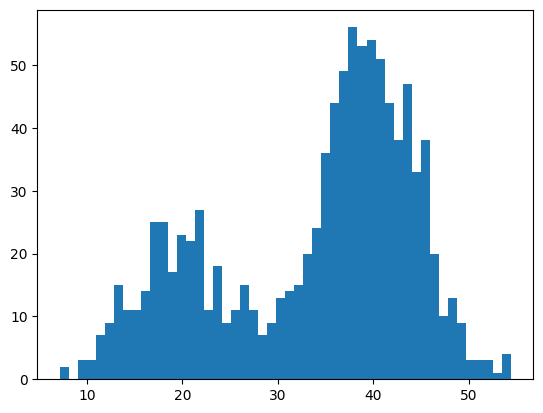

In [3]:
# plot  histogram bins =50
plt.hist(sample,bins=50)

In [4]:
from sklearn.neighbors import KernelDensity


In [5]:
model = KernelDensity(bandwidth=1.5,kernel='gaussian')

In [6]:
# convert data to a 2D array
sample = sample.reshape((len(sample),1))
model.fit(sample)

,"bandwidth bandwidth: float or {""scott"", ""silverman""}, default=1.0The bandwidth of the kernel. If bandwidth is a float, it defines thebandwidth of the kernel. If bandwidth is a string, one of the estimationmethods is implemented.",1.5
,"algorithm algorithm: {'kd_tree', 'ball_tree', 'auto'}, default='auto'The tree algorithm to use.",'auto'
,"kernel kernel: {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'}, default='gaussian'The kernel to use.",'gaussian'
,"metric metric: str, default='euclidean'Metric to use for distance computation. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.Not all metrics are valid with all algorithms: refer to thedocumentation of :class:`BallTree` and :class:`KDTree`. Note that thenormalization of the density output is correct only for the Euclideandistance metric.",'euclidean'
,"atol atol: float, default=0The desired absolute tolerance of the result. A larger tolerance willgenerally lead to faster execution.",0
,"rtol rtol: float, default=0The desired relative tolerance of the result. A larger tolerance willgenerally lead to faster execution.",0
,"breadth_first breadth_first: bool, default=TrueIf true (default), use a breadth-first approach to the problem.Otherwise use a depth-first approach.",True
,"leaf_size leaf_size: int, default=40Specify the leaf size of the underlying tree. See :class:`BallTree`or :class:`KDTree` for details.",40
,"metric_params metric_params: dict, default=NoneAdditional parameters to be passed to the tree for use with themetric. For more information, see the documentation of:class:`BallTree` or :class:`KDTree`.",None


In [7]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(len(values),1)

In [8]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

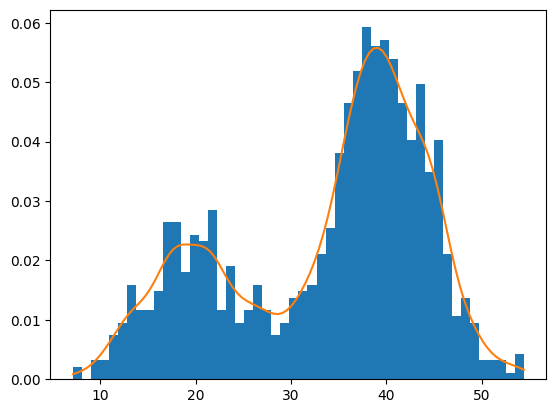

In [9]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)
plt.show()

<Axes: ylabel='Density'>

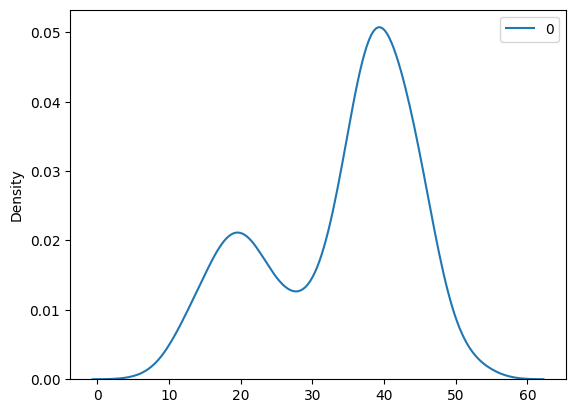

In [10]:
sns.kdeplot(sample,bw_adjust=1)